### OOP Kmeans

**Input - Output**
10 Feature
F1 - F10 := Dataset, Dataset type: Panel Data

**Process**
1. Import libraries needed
2. Load the dataset
3. Check the dataset (head, tail, length)
4. Decide on the feature
5. Make instance from KmeansImplementation class

**OOP Implementation**
*Method*
1. Init
2. Str
3. Zip Feature
4. Visualize Dataset
5. Calculate Elbow
6. Visualize Elbow
7. Fit into Kmeans
8. Show Kmeans
9. Predict New Datapoints

**OOP Process**
1. zipFeature
2. vizItems
3. calculateDistortion
4. vizDistortion: get K (best clusters)
5. fitKmeans
6. vizKmeans
7. labelDatapoints


Import libraries needed,

Pandas: Panel Data 
Numpy: Hold the main role to calculate arrays
Cdist: Used to calculate euclidean distance
Matplotlib: Visualization 
Kmeans: Collection of function to apply Kmeans algorithm

InteractiveShell and magic matplotlib to make visualization easier in notebook

In [1]:
# Import libraries needed

import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#from sklearn import metrics
% matplotlib inline

# Interactive Jupyter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Load the dataset with latin encoding (it is error otherwise, don't know why)

In [2]:
# Loads the dataset

ds = pd.read_csv('customers.csv', encoding='latin1')

### Some notes about the values
**Marital Status:** 0 -> Married ; 1 -> Divorced

 **Gender:** 0 -> Male ; 1 -> Female

**Education:** 1 -> Junior High ; 2 -> Senior High ; 3 -> Bachelor ; 4 -> Master ; 5 -> PhD

**Occupation:** 1 -> Employees ; 2 -> ; 3 -> ; 4 -> ; 5 -> 

In [3]:
# Some info tables

info = {'Marital Status': ['Married', 'Divorced', '-', '-', '-', '-'], 
        'Gender': ['Male', 'Female', '-', '-', '-', '-'],
       'Education': ['-', 'Junior High', 'Senior High', 'Bachelor', 'Master', 'PhD'],
       'Occupation': ['-', 'Employees', 2, 3, 4, 5]}

ds_info = pd.DataFrame(info)

display(ds_info)

,Education,Gender,Marital Status,Occupation
0,-,Male,Married,-
1,Junior High,Female,Divorced,Employees
2,Senior High,-,-,2
3,Bachelor,-,-,3
4,Master,-,-,4
5,PhD,-,-,5


**Check Head**

See our data list

In [4]:
# Test print dataset head

ds.head()

,CustomerName,Age,MaritalStatus,IncomeRange,Gender,TotalChildren,ChildrenAtHome,Education,Occupation,HomeOwner,Cars
0,Aaron Adams,42,0,50000,0,0,0,3,2,1,1
1,Aaron Alexander,40,1,50000,0,0,0,2,2,1,2
2,Aaron Allen,63,0,25000,0,2,1,2,1,1,2
3,Aaron Baker,56,1,50000,0,4,2,2,2,1,2
4,Aaron Bryant,72,0,75000,0,4,0,4,4,1,2


**Check Tail**

In [5]:
# Test print dataset tail

ds.tail()

,CustomerName,Age,MaritalStatus,IncomeRange,Gender,TotalChildren,ChildrenAtHome,Education,Occupation,HomeOwner,Cars
18503,Zoe Rogers,50,0,100000,1,0,0,5,2,0,0
18504,Zoe Sanchez,68,0,75000,1,2,1,3,5,1,1
18505,Zoe Sanders,51,1,50000,1,3,3,4,2,1,2
18506,Zoe Torres,60,1,50000,1,2,0,2,2,1,2
18507,Zoe Watson,66,1,75000,1,4,2,3,5,1,1


**Check Length**

Get the gist of how much data there is. Even though you can actually see it in the tail index

In [6]:
# Test print dataset len

print(f"Dataset length is {len(ds)}")

Dataset length is 18508


Input feature data from Panel Data tables to feature variables

We could somehow iterate through all the columns, it will be easier that way if there are >10 columns. But inputting it manually will actually makes it easier to track which feature we'd like to use

In [7]:
# Choose feature that we would like to use

# Input the column name inside square brackets
f1 = ds["Age"].values
f2 = ds["MaritalStatus"].values
f3 = ds["IncomeRange"].values
f4 = ds["Gender"].values
f5 = ds["TotalChildren"].values
f6 = ds["ChildrenAtHome"].values
f7 = ds["Education"].values
f8 = ds["Occupation"].values
f9 = ds["HomeOwner"].values
f10 = ds["Cars"].values

# Test print results
f1[:5]
f2[:5]

array([42, 40, 63, 56, 72], dtype=int64)

array([0, 1, 0, 1, 0], dtype=int64)

Building the KmeansImplementation class

In [8]:
# Let's build the class

class KmeansImplementation:
    """
    Implementation of Kmeans using OOP
    """
    def __init__ (self, feature1, feature2):
        '''Initialize 2 features to be processed'''
        self.f1 = feature1
        self.f2 = feature2
        self.X = [] # Initialize empty list
    
    def __str__(self):
        '''Print the values of 5 first data in the feature'''
        #print("The First 5 Value of Feature 1:", self.f1[:5])
        #print("\nThe First 5 Value of Feature 2:", self.f2[:5])
        return f"The First 5 Value of Feature 1: {self.f1[:5]} \nThe First 5 Value of Feature 2: {self.f2[:5]}"
    
    def zipFeature(self):
        """Zip feature 1 and feature 2 into 1 ndarray"""
        self.X = np.array(list(zip(self.f1, self.f2))).reshape(len(self.f1), 2)
        return self.X
    
    def showItems(self):
        '''Print the values of ndarray using view()'''
        print("First Feature:", self.f1.view(), "\nSecond Feature:", self.f2.view())
        if self.X != []:
            print("\nZipped Array:", self.X.view())
        else:
            print("\nZipped Array:", self.X)
    
    def vizDataset(self):
        """Visualize feature 1 and feature 2 dataset with scatter plot"""
        self.m1 = (max(self.f1) + min(self.f1)) // 5  # gets the value of mean to help centering the visualized item from dataset 
        self.m2 = (max(self.f2) + min(self.f2)) // 5 # the means is actually (min + max) // 5
        plt.plot()
        plt.xlim([(min(self.f1) - self.m1), (max(self.f1) + self.m1)])
        plt.ylim([(min(self.f2) - self.m2), (max(self.f2) + self.m2)])
        plt.title('Dataset')
        plt.scatter(self.f1, self.f2)
        plt.show()
    
    def calculateDistortion(self, K):
        """
        Accept K as the last range of potential clusters such as range(1, K)
        And then loop through the range() to search the elbow of the zipped feature
        """
        # number of clusters inserted by user
        self.K = range(1, K) 
        
        # Initialize empty list to store distortions' result for each iteration of K
        self.distortions = []
        for k in self.K:
            """For potential clusters in range 1 to K"""
            # Fit the model to Kmeans
            kmeanModel = KMeans(n_clusters=k).fit(self.X)
            
            # Measure the distance with euclidean methods from datapoints to cluster centers
            # Get the shortest distance from all the K cluster centers
            # Adds up all the shortest distance and divide it with amount of samples to get the mean of the distortion
            self.distortions.append(sum(np.min(cdist(self.X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / self.X.shape[0])
        
        print("Calculations Done")
        return self.distortions
        
    def vizDistortion(self):
        """Visualize Distortion with plot"""
        plt.plot(self.K, self.distortions, 'bo-')
        plt.xlabel('Clusters Number')
        plt.ylabel('Distortion')
        plt.title('The Elbow Method showing optimal clusters')
        plt.show()
    
    def fitKmeans(self, clusters):
        """Accept k, number of clusters (user input), with integer datatype as parameter and"""
        self.c = clusters
        self.fit_kmeans = KMeans(n_clusters = self.c).fit(self.X)
        cc_frame = pd.DataFrame(self.fit_kmeans.cluster_centers_, columns = ["Cluster Center X", "Cluster Center Y"])
        return cc_frame 
    
    def vizKmeans(self):
        """Visualize Kmeans clusters with scatter"""
        label = self.fit_kmeans.labels_
        colors = ["blue", "green", "cyan", "magenta", "yellow", "black"]
        
        plt.figure(figsize=(10,8))
        plt.title("Kmeans Clustering")
        plt.xlabel("First feature")
        plt.ylabel("Second feature")
        plt.xlim([(min(self.f1) - self.m1), (max(self.f1) + self.m1)])
        plt.ylim([(min(self.f2) - self.m2), (max(self.f2) + self.m2)])
        plt.scatter(self.X[:, 0], self.X[:, 1], marker='o', c = label, cmap=matplotlib.colors.ListedColormap(colors))
        plt.scatter(self.fit_kmeans.cluster_centers_[:, 0], self.fit_kmeans.cluster_centers_[:,1], marker='x', c='r')
        plt.show()
        
    def labelDatapoints(self, dp):
        """Accept datapoints with list datatype: [x, y] as parameter and give it labels"""
        self.dp = dp
        return self.fit_kmeans.predict([self.dp])

Notes to be remembered 

1. **Feature 1**: Age
2. **Feature 2**: MaritalStatus
3. **Feature 3**: IncomeRange
4. **Feature 4**: Gender
5. **Feature 5**: TotalChildren

6. **Feature 6**: ChildrenAtHome
7. **Feature 7**: Education
8. **Feature 8**: Occupation
9. **Feature 9**: HomeOwner
10. **Feature 10**: Cars

**First**

We'd like to see how Age brings effect to people's Income Range

Make instance and pass feature values to the class

In [9]:
# Initialize a class

first = KmeansImplementation(f1, f3)
first
print(first)

The First 5 Value of Feature 1: [42 40 63 56 72] 
The First 5 Value of Feature 2: [50000 50000 25000 50000 75000]


Show the values inside the class

In [10]:
# Show items with __str__

first.showItems()

First Feature: [42 40 63 ... 51 60 66] 
Second Feature: [50000 50000 25000 ... 50000 50000 75000]

Zipped Array: []


Zip the values into 1 ndarray

In [11]:
# Zip feature into ndarray

first.zipFeature()

array([[   42, 50000],
       [   40, 50000],
       [   63, 25000],
       ...,
       [   51, 50000],
       [   60, 50000],
       [   66, 75000]], dtype=int64)

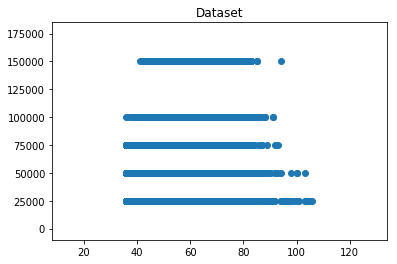

In [12]:
# Visualize dataset

first.vizDataset()

Get the gist of how the dataset looks like before we run any clustering on it

Calculate the distortion of 10 clusters.

The number of how much clusters could be tried actually is up to the user. And from the visualization of the dataset above, we somehow actually get the idea of how much cluster there might be for the data (or maybe now, if the data more variety of the data)

In [13]:
# Calculate Elbow

first.calculateDistortion(10)

Calculations Done


[26292.15784558461,
 17659.725698802482,
 10185.425339401478,
 4967.379134476677,
 8.979781369970226,
 7.610125650166909,
 6.549450892711249,
 5.766413096531202,
 5.377656281716652]

Visualizing the Elbow Method.

We actually need to see where the 'elbow' is located. Elbow is the place where the 'big change' of means ends. It means that after the elbow (or if we add more clusters, we could say), there's no substantial of change in the means (or any change is so little it can be disregarded)

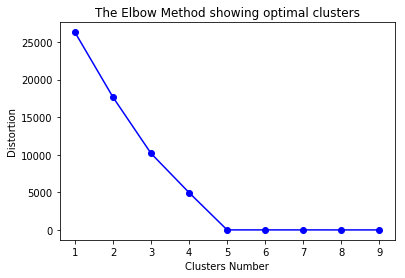

In [14]:
# Visualize Elbow

first.vizDistortion()

The coordinate of the cluster centers.

It is labeled at random from the scikit-learn module (maybe?). Some more improvement could be made to actually make it obvious which clusters have which labels.

In [15]:
# Fit data to Kmeans

first.fitKmeans(5)

,Cluster Center X,Cluster Center Y
0,56.071129,75000.0
1,58.279484,150000.0
2,51.973744,50000.0
3,53.101300,25000.0
4,55.341781,100000.0


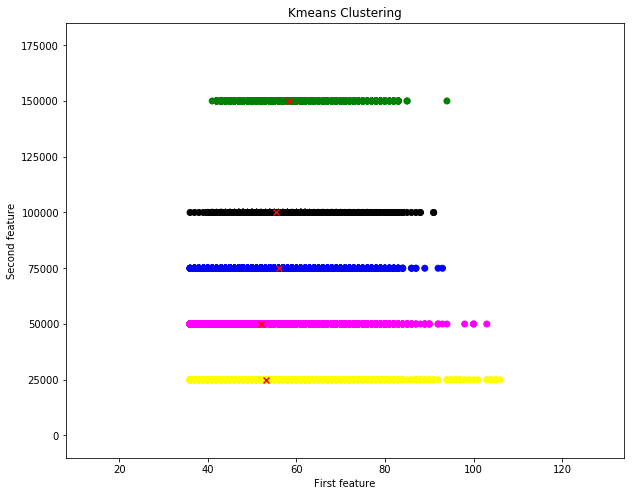

In [16]:
# Visualize Kmeans: Get centroids

first.vizKmeans()

First Feature is Age, and Second Feature is Income Range. (need to add legends to that, improvements noted)

From the data, we can derive that:
1. No one earned 150k before 40 yo. We can see from the left tip of top data pack.
2. For every 90+ yo people, they didn't earn more than 50k. We can see that from the right tip of 75k ~ 150k data pack.
3. From the cluster centers data, we could also conclude that the average of customers age is 50 yo. From the visualization, we could see that by how the cluster is located between 40 ~ 60 yo

Below is  the test to label new datapoints (or new customers data)

In [17]:
# Label new datapoints
# Insert values to x

# q is 40 years old with 75000 income
q = [40, 75000]
first.labelDatapoints(q)

array([0])

**Second**

We'd like to see how Occupation affects Income Range

*note: the rest of the implementation below are repetitive from the first implementation. So, you could skip (or skim) through it and jump right to the visualization*

In [18]:
second = KmeansImplementation(f8, f3)
second
print(second)

The First 5 Value of Feature 1: [2 2 1 2 4] 
The First 5 Value of Feature 2: [50000 50000 25000 50000 75000]


In [19]:
second.showItems()

First Feature: [2 2 1 ... 2 2 5] 
Second Feature: [50000 50000 25000 ... 50000 50000 75000]

Zipped Array: []


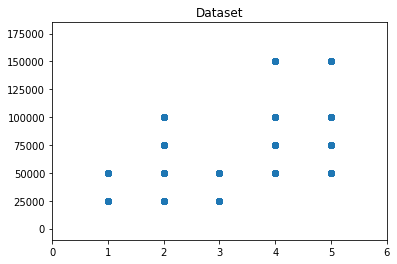

In [20]:
second.vizDataset()

In [21]:
second.zipFeature()

array([[    2, 50000],
       [    2, 50000],
       [    1, 25000],
       ...,
       [    2, 50000],
       [    2, 50000],
       [    5, 75000]], dtype=int64)

In [22]:
second.calculateDistortion(10)

Calculations Done


[26292.153158860787,
 17659.719059171322,
 10184.76747764575,
 4962.4381998889,
 0.8537513180622531,
 0.5761065905878616,
 0.5032675431185419,
 0.43904632456649406,
 0.31657023810898993]

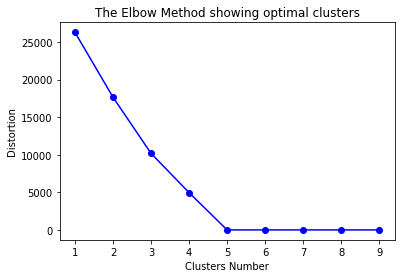

In [23]:
second.vizDistortion()

In [24]:
second.fitKmeans(5)

,Cluster Center X,Cluster Center Y
0,4.347052,150000.0
1,2.779275,50000.0
2,4.191166,100000.0
3,3.927594,75000.0
4,1.454483,25000.0


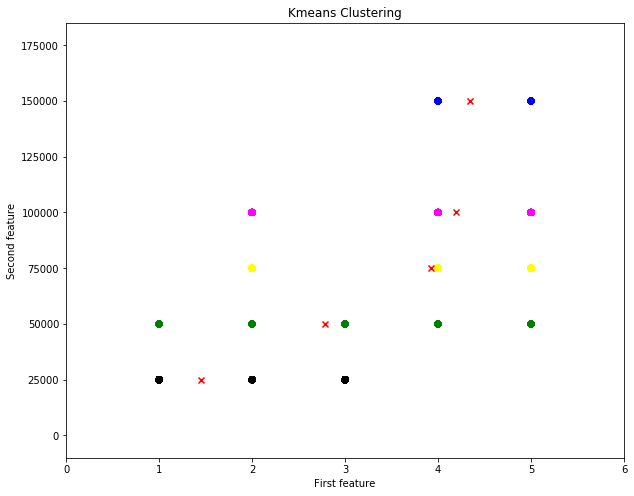

In [25]:
second.vizKmeans()

First Feature is Occupation labeled from 1 ~ 5, and Second Feature is Income Range.

From the data, we can derive that:
1. No one in group 1 and 3 earned more than 50k. 
2. Every person in group 4 and 5 earned at least 50k
3. It means, even the lowest paying for group 4 or 5 are actually equal or more than the highest paying for group 1 or 3
4. We could also see that people belong to group 2 could have income equal or more than group 1 and 3, but they can't have income as high as group 4 and 5

*Some things to note from how the clusters 'bent' or is closer to one group, while further from the others is actually worth mentioning and it's actually interesting. We could also see that from the cluster centers coordinate (which actually a mean of that group).*

5. The bottom left clusters is closer to group 1. That means the lowest paying jobs is closer to group 1 than to group 2 or 3
6. The bottom middle (horizontally) cluster is closer to group 3. Because there's actually potential for all groups to have 50k income, we could try to slice the board into 2 and find that the cluster is on the left hand-side on the board. That means the cluster centers is more closer to represent group 1 to 3 (group 2 and 3 specifically).
7. The second and third cluster from above is quite interesting in the fact that like the cluster center before, they represent group 4 and 5 more than group 3. From this, we could derive that there's more group 4 and 5 people that has 75k (and more so in 100k range) than there is in group 3
8. The top cluster centers is the most interesting of all. Somehow it is more closer to group 4 than group 5. And the fact that there is no group 3, it could be concluded that there are more people earn 150k in group 4, than there is in group 5

**Final Conclusion**

1. From all the cluster centers above we can see that the cluster made some kind of projection upwards. It means that with the increase of group, there's an increase in Income Range.
2. From the last 2 derived conclusion, we could take assumption that there are more people in group 4 that earned 150k more than there is in group 5. And there are more people in group 5 that earned 100k more than there is in group 4

In [26]:
# w is employee with 75000 income 
w = [1, 75000]
second.labelDatapoints(w)

array([3])

**Third**

We'd like to see how Education affects Income Range

In [27]:
third = KmeansImplementation(f7, f3)
third
print(third)

The First 5 Value of Feature 1: [3 2 2 2 4] 
The First 5 Value of Feature 2: [50000 50000 25000 50000 75000]


In [28]:
third.showItems()

First Feature: [3 2 2 ... 4 2 3] 
Second Feature: [50000 50000 25000 ... 50000 50000 75000]

Zipped Array: []


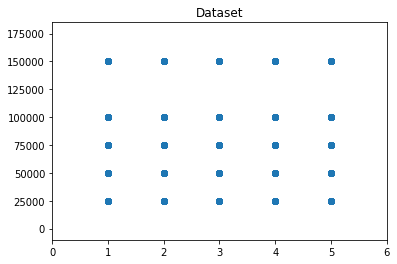

In [29]:
third.vizDataset()

In [30]:
third.zipFeature()

array([[    3, 50000],
       [    2, 50000],
       [    2, 25000],
       ...,
       [    4, 50000],
       [    2, 50000],
       [    3, 75000]], dtype=int64)

In [31]:
third.calculateDistortion(10)

Calculations Done


[26292.153128797283,
 17659.719055073077,
 10184.81923875645,
 4962.582322093802,
 0.9201802200921065,
 0.79912383401354,
 0.6933369846333512,
 0.6263382031816823,
 0.5670402489397133]

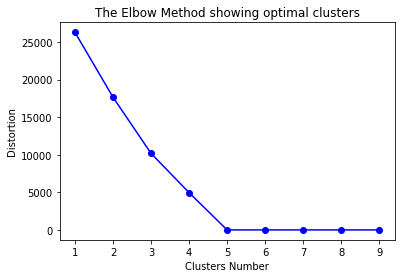

In [32]:
third.vizDistortion()

In [33]:
third.fitKmeans(5)

,Cluster Center X,Cluster Center Y
0,3.230352,50000.0
1,3.461984,100000.0
2,3.414619,150000.0
3,3.732446,75000.0
4,2.316222,25000.0


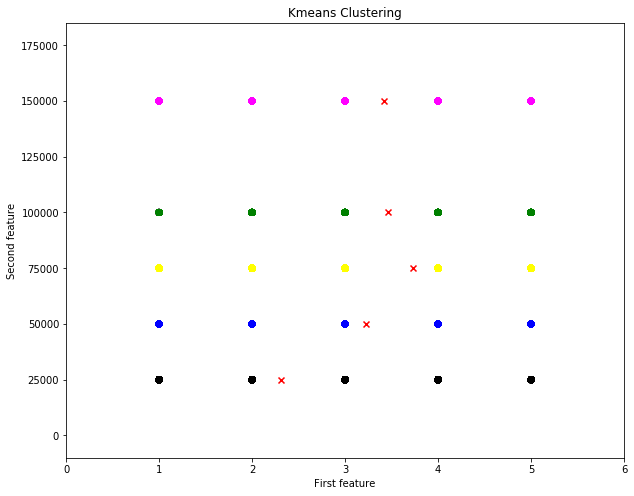

In [34]:
third.vizKmeans()

First Feature is Education labeled from 1 ~ 5, and Second Feature is Income Range.

From the data we can derive that for every education level, there are people that has income from lowest to highest. It is interesting to see where the cluster centers ended up. Because the slots (or all feature all filled (?)) is full. We can slice the board into 2 parts to help group the people to specific conclusion.
1. The lowest cluster centers is in the left hand-side on the board, that means on group 1 ~ 3, there are more people earning 25k than people on group 3 ~ 5
2. The cluster centers other than the lowest one, is all on the right hand-side, that means there are more people earning 50k and more on group 3 ~ 5
3. People on group 4 ~ 5 are more likely to earn 75k, the middle (vertically) cluster centers is closer to group 4 ~ 5
4. The rest upwards is actually comeback to the center, it means the income earned is diversed into all groups from 100k upward.

In [35]:
# e is highschooler that has 100000 income
e = [2, 100000]
third.labelDatapoints(e)

array([1])

**Fourth**

We'd like to see how Income Earned affects House Owned

In [36]:
fourth = KmeansImplementation(f3, f9)
fourth
print(fourth)

The First 5 Value of Feature 1: [50000 50000 25000 50000 75000] 
The First 5 Value of Feature 2: [1 1 1 1 1]


In [37]:
fourth.showItems()

First Feature: [50000 50000 25000 ... 50000 50000 75000] 
Second Feature: [1 1 1 ... 1 1 1]

Zipped Array: []


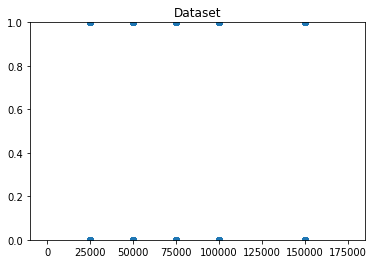

In [38]:
fourth.vizDataset()

In [40]:
fourth.zipFeature()

array([[50000,     1],
       [50000,     1],
       [25000,     1],
       ...,
       [50000,     1],
       [50000,     1],
       [75000,     1]], dtype=int64)

In [41]:
fourth.calculateDistortion(10)

Calculations Done


[26292.153083708647,
 17659.719004341405,
 10184.767651214037,
 4962.311581770233,
 0.4334927857063009,
 0.2954961164144393,
 0.1769218218633455,
 0.10071906038705193,
 0.040093692603303754]

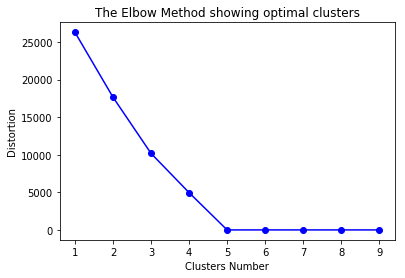

In [43]:
fourth.vizDistortion()

In [44]:
fourth.fitKmeans(5)

,Cluster Center X,Cluster Center Y
0,75000.0,0.723327
1,150000.0,0.648649
2,50000.0,0.662699
3,100000.0,0.716510
4,25000.0,0.593087


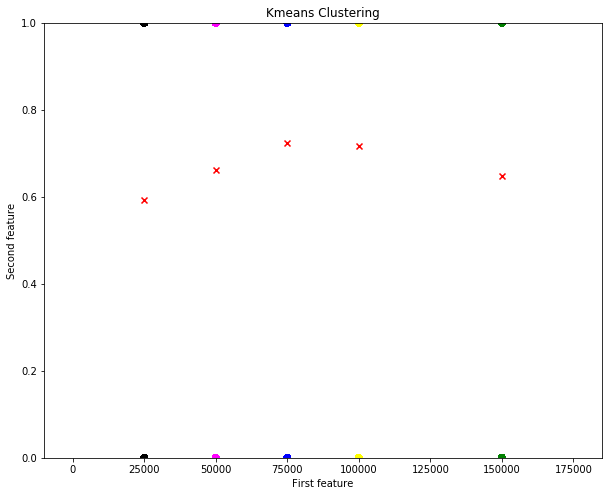

In [45]:
fourth.vizKmeans()

First Feature is Income Range labeled from 1 ~ 5, and Second Feature is House Owned.

We could see from the data, like before, the slots are all filled. Which means for every income range, people do owns a house, or don't, irrespective from how much income they have.

Though we can also see how people with income range of 25k have lower chance to own a house than the other group of income range.

**Fifth**

We'd like to see how Income Range affects Car Owned by people.

In [46]:
fifth = KmeansImplementation(f3, f10)
fifth
print(fifth)

The First 5 Value of Feature 1: [50000 50000 25000 50000 75000] 
The First 5 Value of Feature 2: [1 2 2 2 2]


In [47]:
fifth.showItems()

First Feature: [50000 50000 25000 ... 50000 50000 75000] 
Second Feature: [1 2 2 ... 2 2 1]

Zipped Array: []


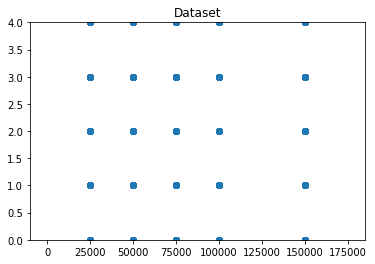

In [48]:
fifth.vizDataset()

array([[50000,     1],
       [50000,     2],
       [25000,     2],
       ...,
       [50000,     2],
       [50000,     2],
       [75000,     1]], dtype=int64)

Calculations Done


[26292.153117028432,
 17659.71903819788,
 10184.801168068254,
 4962.477963466604,
 0.8202064847937831,
 0.7034237236156736,
 0.5893587591580008,
 0.5194518561519129,
 0.46714517124363425]

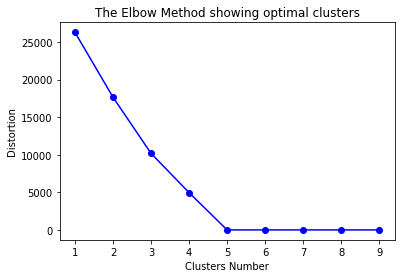

In [49]:
fifth.zipFeature()
fifth.calculateDistortion(10)
fifth.vizDistortion()

,Cluster Center X,Cluster Center Y
0,75000.0,1.380631
1,150000.0,3.109951
2,50000.0,1.146158
3,25000.0,1.114648
4,100000.0,1.945329


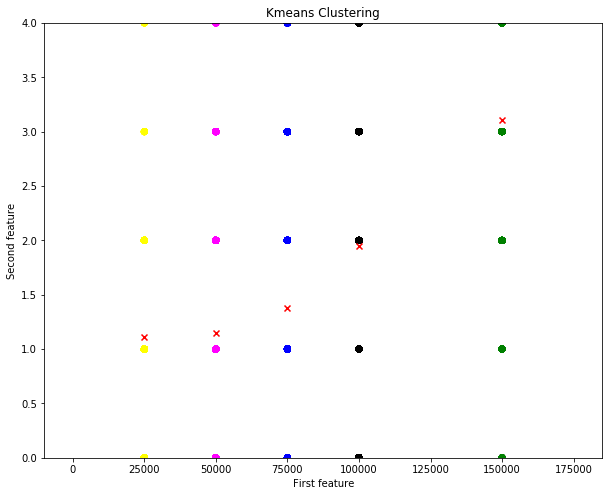

In [50]:
fifth.fitKmeans(5)
fifth.vizKmeans()

First Feature is Income Range labeled from 1 ~ 5, and Second Feature is Car Owned.

We could see from the data, like before, the slots are all filled again. Which means for every income range, people do do have car (and it's up to 4 cars) or don't have.

We could see from the projection line of the cluster centers is going up from the lowest income range to the highest income range (from 1 to 3). Which means that the higher income earned for people, the higher the chance they have car more than 1.

Also, people from each income range have at least 1 car.

### That's it for our analysis!